In [2]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import tensorflow as tf
from tensorflow.keras import layers, optimizers
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image


In [4]:
train_path='F:\Covid19-dataset\\train'
test_path='F:\Covid19-dataset\\test'


In [5]:

#os.listdir('../input/covid19-image-dataset/Covid19-dataset')
#os.listdir('../input/covid19-image-dataset/Covid19-dataset/test/Covid')


In [6]:
os.listdir(train_path)
os.listdir('F:\Covid19-dataset')
os.listdir('F:\Covid19-dataset\\test\\Covid')

['0100.jpeg',
 '0102.jpeg',
 '0105.png',
 '0106.jpeg',
 '0108.jpeg',
 '0111.jpg',
 '0112.jpg',
 '0113.jpg',
 '0115.jpeg',
 '0118.jpeg',
 '0119.jpeg',
 '0120.jpg',
 '094.png',
 '096.png',
 '098.jpeg',
 'auntminnie-2020_01_31_20_24_2322_2020_01_31_x-ray_coronavirus_US.jpg',
 'auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'COVID-00003b.jpg',
 'COVID-00012.jpg',
 'COVID-00022.jpg',
 'COVID-00033.jpg',
 'COVID-00037.jpg',
 'radiopaedia-2019-novel-coronavirus-infected-pneumonia.jpg']

uint8
(659, 651, 3)


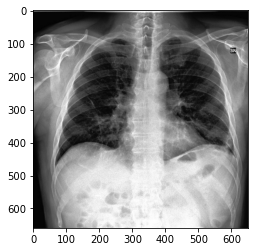

In [7]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
data = image.imread('F:\Covid19-dataset\\test\\Covid\\0100.jpeg')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

In [8]:
# function that would read an image provided the image path, preprocess and return it back
#IMREAD_COLOR بتحدد الطريقة اللي الصورة تتقري بيها
def read_and_preprocess(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR) # reading the image
    img = cv2.resize(img, (256, 256)) # resizing it (I just like it to be powers of 2)
    img = np.array(img, dtype='float32') # convert its datatype so that it could be normalized
    img = img/255 # normalization (now every pixel is in the range of 0 and 1)
    return img

In [9]:
X_train = [] # To store train images
y_train = [] # To store train labels

# labels -
# 0 - Covid
# 1 - Viral Pneumonia
# 2 - Normal

train_path = "F:\Covid19-dataset\\train\\" # path containing training image samples

In [10]:
import cv2
for folder in os.scandir(train_path):
    for entry in os.scandir(train_path + folder.name):

        X_train.append(read_and_preprocess(train_path + folder.name + '\\' + entry.name))
        
        if folder.name[0]=='C':
            y_train.append(0)
        elif folder.name[0]=='V':
            y_train.append(1)
        else:
            y_train.append(2)

In [11]:
X_train = np.array(X_train)
X_train.shape # We have 251 training samples in total


(251, 256, 256, 3)

In [12]:
y_train = np.array(y_train)
y_train.shape

(251,)

<BarContainer object of 3 artists>

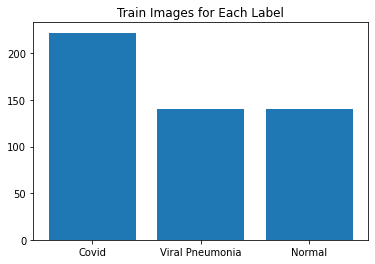

In [63]:
#Visualizing the Dataset
covid_count = len(y_train[y_train==0])
pneumonia_count = len(y_train[y_train==1])
normal_count = len(y_train[y_train==2])

plt.title("Train Images for Each Label")
plt.bar(["Covid", "Viral Pneumonia", "Normal"],[covid_count, pneumonia_count, normal_count])

In [14]:
# We have more number of covid samples that Pneumonia and Normal


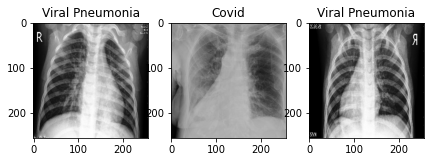

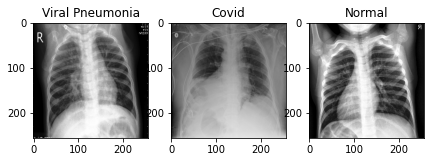

In [65]:
# Plotting 2 images per disease

import random

title = {0:"Covid", 1:"Viral Pneumonia", 2:"Normal"}

rows = 2
columns = 3

for i in range(2):
    
    fig = plt.figure(figsize=(7,7))
    #بعرض صور علي شكل مصفوفة 2*3
    fig.add_subplot(rows, columns, 1)
    pos = random.randint(0, covid_count)
    plt.imshow(X_train[pos])
    plt.title(title[y_train[pos]])
    
    fig.add_subplot(rows, columns, 2)
    pos = random.randint(covid_count, covid_count+pneumonia_count)
    plt.imshow(X_train[pos])
    plt.title(title[y_train[pos]])
    
    fig.add_subplot(rows, columns, 3)
    pos = random.randint(covid_count+pneumonia_count, covid_count+pneumonia_count+normal_count)
    plt.imshow(X_train[pos])
    plt.title(title[y_train[pos]])

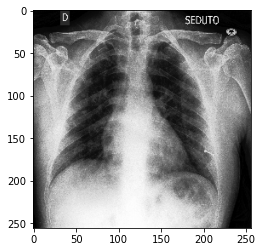

In [16]:
#image augmentation
plt.imshow(X_train[0])

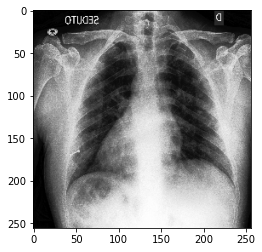

In [17]:
#fliplr بتعكس احداثيات الصورة من الشمال للميمين
X_new = np.fliplr(X_train[0])
plt.imshow(X_new)

In [18]:
X_aug = []
y_aug = []

for i in range(0, len(y_train)):
    X_new = np.fliplr(X_train[i])
    X_aug.append(X_new)
    y_aug.append(y_train[i])

In [19]:
X_aug = np.array(X_aug)
y_aug = np.array(y_aug)

In [20]:
X_train = np.append(X_train, X_aug, axis=0) # appending augmented images to original training samples
X_train.shape

(502, 256, 256, 3)

In [21]:
y_train = np.append(y_train, y_aug, axis=0)
y_train.shape

(502,)

In [22]:
X_val = [] # To store validation and test images
y_val = [] # To store validation and test labels

val_path = 'F:\Covid19-dataset\\test\\'

for folder in os.scandir(val_path):
    for entry in os.scandir(val_path + folder.name):

        X_val.append(read_and_preprocess(val_path + folder.name + '\\' + entry.name))
        
        if folder.name[0]=='C':
            y_val.append(0)
        elif folder.name[0]=='V':
            y_val.append(1)
        else:
            y_val.append(2)
            
X_val = np.array(X_val)
y_val = np.array(y_val)

In [23]:
X_val.shape # We have 66 images for validation and testing

(66, 256, 256, 3)

<BarContainer object of 3 artists>

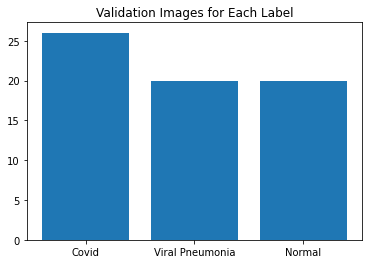

In [24]:
covid_count = len(y_val[y_val==0])
pneumonia_count = len(y_val[y_val==1])
normal_count = len(y_val[y_val==2])

plt.title("Validation Images for Each Label")
plt.bar(["Covid", "Viral Pneumonia", "Normal"],[covid_count, pneumonia_count, normal_count])

# We have more number of covid samples that Pneumonia and Normal in test dataset as well

In [25]:
model1=Sequential()
model1.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)))

model1.add(Conv2D(64,(3,3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(128,(3,3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))

model1.add(Flatten())

model1.add(Dense(64,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(3,activation='softmax'))

model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [26]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 128)      0         
 2D)                                                    

In [27]:
#batch_size بتقسم ال epocs 
basic1 = model1.fit(X_train, y_train, epochs = 20, validation_data=(X_val, y_val), batch_size=8)

Epoch 1/20
63/63 [==============================] - 72s 1s/step - loss: 1.0847 - accuracy: 0.5199 - val_loss: 1.0902 - val_accuracy: 0.4394
Epoch 2/20
63/63 [==============================] - 72s 1s/step - loss: 0.7495 - accuracy: 0.6554 - val_loss: 0.6529 - val_accuracy: 0.6515
Epoch 3/20
63/63 [==============================] - 75s 1s/step - loss: 0.6336 - accuracy: 0.6972 - val_loss: 0.5588 - val_accuracy: 0.8333
Epoch 4/20
63/63 [==============================] - 73s 1s/step - loss: 0.5803 - accuracy: 0.7271 - val_loss: 0.5998 - val_accuracy: 0.8333
Epoch 5/20
63/63 [==============================] - 74s 1s/step - loss: 0.4725 - accuracy: 0.7829 - val_loss: 0.5633 - val_accuracy: 0.6970
Epoch 6/20
63/63 [==============================] - 75s 1s/step - loss: 0.4712 - accuracy: 0.8068 - val_loss: 0.5231 - val_accuracy: 0.8030
Epoch 7/20
63/63 [==============================] - 74s 1s/step - loss: 0.3962 - accuracy: 0.8127 - val_loss: 0.5192 - val_accuracy: 0.7727
Epoch 8/20
63/63 [==

In [30]:
predictions = model1.predict(X_val)

In [31]:
predictions.shape


(66, 3)

In [32]:
# Obtain the predicted class from the model prediction
predict = []

for i in predictions:
  predict.append(np.argmax(i))

predict = np.asarray(predict)

In [33]:
# Obtain the accuracy of the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, predict)
accuracy

0.8939393939393939

In [36]:
from sklearn.metrics import classification_report

report = classification_report(y_val, predict)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        26
           1       1.00      0.75      0.86        20
           2       0.80      1.00      0.89        20

    accuracy                           0.89        66
   macro avg       0.91      0.89      0.89        66
weighted avg       0.91      0.89      0.89        66



In [37]:
#test images
from tensorflow.keras.preprocessing import image
path='F:/Covid19-dataset//test//Covid//COVID-00003b.jpg'
img=image.load_img(path,target_size=(256,256))
img=image.img_to_array(img)/255
#convert to 1D array
img=np.array([img])
img.shape
#now predict
result=np.argmax(model1.predict(img))
print(result)
if result==0:
    print("covid")
elif(result==1):
    print("Normal")
elif result==2:
    print("viral pneumonia")


0
covid


In [38]:
# lets create model 2 with an optimiser as Adam

In [39]:
model3=Sequential()
model3.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)))

model3.add(Conv2D(64,(3,3),activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(128,(3,3),activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))

model3.add(Flatten())
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(3,activation='softmax'))

model3.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 conv2d_4 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 126, 126, 64)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 124, 124, 128)     73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 128)      0         
 2D)                                                  

In [40]:
basic3 = model3.fit(X_train, y_train, epochs = 20, validation_data=(X_val, y_val), batch_size=8)

Epoch 1/20
63/63 [==============================] - 81s 1s/step - loss: 1.6631 - accuracy: 0.5677 - val_loss: 0.7287 - val_accuracy: 0.5758
Epoch 2/20
63/63 [==============================] - 78s 1s/step - loss: 0.5298 - accuracy: 0.7709 - val_loss: 0.6648 - val_accuracy: 0.7424
Epoch 3/20
63/63 [==============================] - 76s 1s/step - loss: 0.6631 - accuracy: 0.6992 - val_loss: 0.6771 - val_accuracy: 0.6970
Epoch 4/20
63/63 [==============================] - 80s 1s/step - loss: 0.5810 - accuracy: 0.6813 - val_loss: 0.6174 - val_accuracy: 0.7273
Epoch 5/20
63/63 [==============================] - 78s 1s/step - loss: 0.5011 - accuracy: 0.7669 - val_loss: 0.7082 - val_accuracy: 0.8182
Epoch 6/20
63/63 [==============================] - 76s 1s/step - loss: 0.4626 - accuracy: 0.7928 - val_loss: 0.5076 - val_accuracy: 0.8333
Epoch 7/20
63/63 [==============================] - 75s 1s/step - loss: 0.4706 - accuracy: 0.8088 - val_loss: 0.4179 - val_accuracy: 0.8636
Epoch 8/20
63/63 [==

In [43]:
predictions3 = model3.predict(X_val)
predictions3.shape
# Obtain the predicted class from the model prediction
predict3 = []

for i in predictions3:
     predict3.append(np.argmax(i))

predict3 = np.asarray(predict3)
# Obtain the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy3 = accuracy_score(y_val, predict3)
accuracy3

0.9090909090909091

In [45]:
from sklearn.metrics import classification_report

report = classification_report(y_val, predict3)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        26
           1       0.86      0.90      0.88        20
           2       0.89      0.85      0.87        20

    accuracy                           0.91        66
   macro avg       0.90      0.90      0.90        66
weighted avg       0.91      0.91      0.91        66



In [46]:
#model with adam and more conv2d layers
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3,activation='softmax'))

model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 126, 126, 64)      0         
                                                                 
 conv2d_8 (Conv2D)           (None, 124, 124, 128)     73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 128)      0         
 2D)                                                  

In [47]:
basic4 = model.fit(X_train, y_train, epochs = 20, validation_data=(X_val, y_val), batch_size=16)

Epoch 1/20
32/32 [==============================] - 100s 3s/step - loss: 1.1076 - accuracy: 0.4303 - val_loss: 1.0500 - val_accuracy: 0.5152
Epoch 2/20
32/32 [==============================] - 322s 10s/step - loss: 0.7444 - accuracy: 0.6773 - val_loss: 0.6824 - val_accuracy: 0.8333
Epoch 3/20
32/32 [==============================] - 105s 3s/step - loss: 0.5703 - accuracy: 0.7470 - val_loss: 0.5822 - val_accuracy: 0.7121
Epoch 4/20
32/32 [==============================] - 105s 3s/step - loss: 0.4544 - accuracy: 0.8108 - val_loss: 0.4522 - val_accuracy: 0.7424
Epoch 5/20
32/32 [==============================] - 106s 3s/step - loss: 0.3973 - accuracy: 0.8466 - val_loss: 0.4573 - val_accuracy: 0.6818
Epoch 6/20
32/32 [==============================] - 107s 3s/step - loss: 0.4348 - accuracy: 0.8287 - val_loss: 0.4303 - val_accuracy: 0.7424
Epoch 7/20
32/32 [==============================] - 109s 3s/step - loss: 0.3971 - accuracy: 0.8625 - val_loss: 0.5158 - val_accuracy: 0.7273
Epoch 8/20
3

In [50]:
predictions4 = model.predict(X_val)
predictions4.shape
# Obtain the predicted class from the model prediction
predict4 = []

for i in predictions4:
     predict4.append(np.argmax(i))

predict4 = np.asarray(predict4)
# Obtain the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy4 = accuracy_score(y_val, predict4)
accuracy4

0.8787878787878788

In [52]:
from sklearn.metrics import classification_report

report = classification_report(y_val, predict4)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        26
           1       0.89      0.80      0.84        20
           2       0.76      0.95      0.84        20

    accuracy                           0.88        66
   macro avg       0.88      0.88      0.88        66
weighted avg       0.89      0.88      0.88        66



In [53]:
#model 5 with more layers and rmsprop
#model with adam and more conv2d layers
model5=Sequential()
model5.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)))

model5.add(Conv2D(64,(3,3),activation='relu'))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Dropout(0.25))

model5.add(Conv2D(128,(3,3),activation='relu'))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Dropout(0.25))

model5.add(Conv2D(256,(3,3),activation='relu'))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Dropout(0.25))

model5.add(Conv2D(256,(3,3),activation='relu'))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Dropout(0.25))

model5.add(Flatten())

model5.add(Dense(64,activation='relu'))
model5.add(Dropout(0.5))

model5.add(Dense(3,activation='softmax'))

model5.compile(optimizer='RMSprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model5.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 conv2d_12 (Conv2D)          (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 126, 126, 64)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 124, 124, 128)     73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 62, 62, 128)      0         
 2D)                                                  

In [54]:
basic5 = model5.fit(X_train, y_train, epochs = 20, validation_data=(X_val, y_val), batch_size=16)

Epoch 1/20
32/32 [==============================] - 101s 3s/step - loss: 1.6008 - accuracy: 0.5259 - val_loss: 0.8474 - val_accuracy: 0.7424
Epoch 2/20
32/32 [==============================] - 101s 3s/step - loss: 0.6473 - accuracy: 0.7669 - val_loss: 1.5353 - val_accuracy: 0.6515
Epoch 3/20
32/32 [==============================] - 104s 3s/step - loss: 0.6387 - accuracy: 0.7928 - val_loss: 0.6972 - val_accuracy: 0.7273
Epoch 4/20
32/32 [==============================] - 102s 3s/step - loss: 0.5891 - accuracy: 0.7948 - val_loss: 0.4979 - val_accuracy: 0.8030
Epoch 5/20
32/32 [==============================] - 104s 3s/step - loss: 0.4442 - accuracy: 0.8546 - val_loss: 0.4765 - val_accuracy: 0.7879
Epoch 6/20
32/32 [==============================] - 107s 3s/step - loss: 0.4093 - accuracy: 0.8606 - val_loss: 0.5526 - val_accuracy: 0.7727
Epoch 7/20
32/32 [==============================] - 114s 4s/step - loss: 0.3902 - accuracy: 0.8785 - val_loss: 0.4269 - val_accuracy: 0.8030
Epoch 8/20
32

In [57]:
predictions5 = model5.predict(X_val)
predictions5.shape
# Obtain the predicted class from the model prediction
predict5 = []

for i in predictions5:
     predict5.append(np.argmax(i))

predict5 = np.asarray(predict5)
# Obtain the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy5 = accuracy_score(y_val, predict5)
accuracy5

0.8484848484848485

In [59]:
from sklearn.metrics import classification_report

report = classification_report(y_val, predict5)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        26
           1       0.82      0.70      0.76        20
           2       0.77      1.00      0.87        20

    accuracy                           0.85        66
   macro avg       0.85      0.85      0.84        66
weighted avg       0.86      0.85      0.85        66



In [60]:
#test images
from tensorflow.keras.preprocessing import image
path='F:\Covid19-dataset\\test\\Covid\\COVID-00003b.jpg'
img=image.load_img(path,target_size=(256,256))
img=image.img_to_array(img)/255
#convert to 1D array
img=np.array([img])
img.shape
#now predict
result=np.argmax(model3.predict(img))
print(result)
if result==0:
    print("covid")
elif(result==1):
    print("Normal")
elif result==2:
    print("viral pneumonia")


0
covid
